## Linear Regression From Scratch
Regression is a statistical processes for estimating the relationship among variables. To estimate the relationship using linear regression, it is assumed:
$$ Y = \alpha + \beta*X + \epsilon $$
where Y is dependent variable, X is preditor/independt variable, $\epsilon$ is the __residual__ representing the difference between the value of the depedent variable predicted by the model and the true value of the dependent variable.

This script is to implement the linear regression from scratch. Parameters of $\alpha$ and $\beta$ will be found using the method of __ordinary least square__(OLS).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Linear Regression using two dimensional data

In [2]:
xs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ys = [10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]

In [3]:
len(xs),len(ys)

(24, 24)

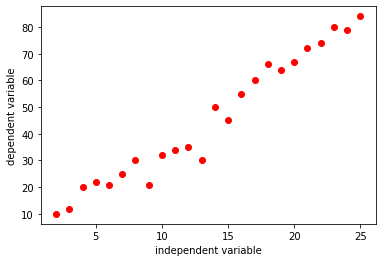

In [4]:
plt.scatter(xs,ys,color = 'red')
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.show()

$\beta = \frac{\sum_{i=0}^n {(Xi-\overline{X})(Yi-\overline{Y})}}{\sum_{i=0}^n{(Xi-\overline{X})^2}} =(mean(x) mean(y) – mean(xy)) / ( mean (x)^2 – mean( x^2))$

$\alpha = \overline{Y} - \beta*\overline{X}$

In [5]:
def slope_intercept(x_var, y_var):
    '''Calculate slope beta and intercept alpha using OLS 
    input - list
    output - slope and intercept'''
    x = np.array(x_var)
    y = np.array(y_var)
    beta = (np.mean(x)*np.mean(y) - np.mean(x*y)) / (np.mean(x)*np.mean(x) - np.mean(x*x))
    alp = np.mean(y)-beta*np.mean(x)
    
    return round(beta,2),round(alp,2)

In [6]:
slope_intercept(xs,ys)

(3.29, 0.88)

In [7]:
b,a = slope_intercept(xs,ys)
reg_line = [b*x+a for x in xs]

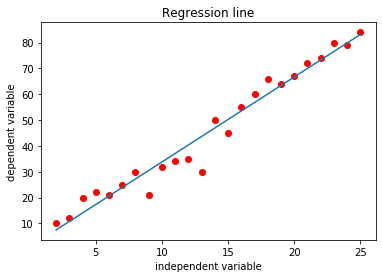

In [8]:
plt.scatter(xs,ys, color ='red')
plt.plot(xs,reg_line)
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.title('Regression line')
plt.show()

### Root mean square error RMSE 

RMSE is the square root of mean (Yi – Y^i)**2

In [9]:
def rmse(y,y_hat):
    y_actual = np.array(y)
    y_pred = np.array(y_hat)
    error = (y_actual - y_pred)**2
    error_mean = round(np.mean(error))
    err_sq = np.sqrt(error_mean)
    return err_sq

In [10]:
rmse(ys,reg_line)

4.58257569495584

In [11]:
#mean square error 
rmse(ys,reg_line)/23

0.19924242151981914

### Linear Regression on Boston housing dataset

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [16]:
df_x.shape

(506, 13)

In [17]:
df_y.shape

(506, 1)

In [19]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
df_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Data Preprocessing

In [22]:
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
df_y.isnull().sum()

0    0
dtype: int64

### Exploratory Data Analysis

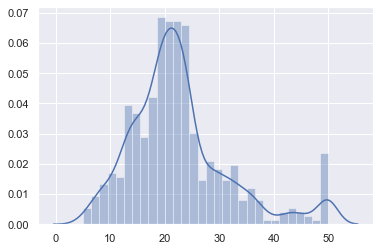

In [25]:
sns.set()
sns.distplot(df_y, bins = 30)
plt.show()

In [27]:
names = [i for i in df_x]
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [28]:
for i, col in enumerate(names):
    print(i, col)

0 CRIM
1 ZN
2 INDUS
3 CHAS
4 NOX
5 RM
6 AGE
7 DIS
8 RAD
9 TAX
10 PTRATIO
11 B
12 LSTAT


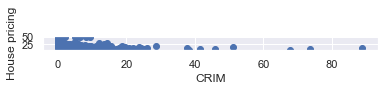

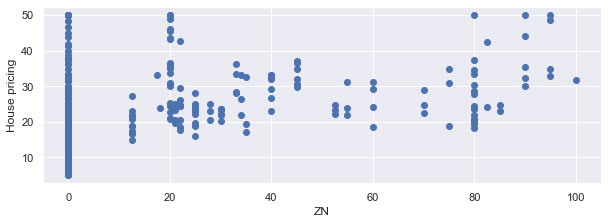

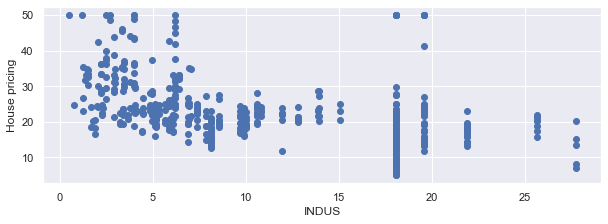

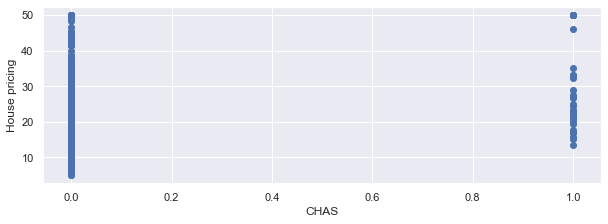

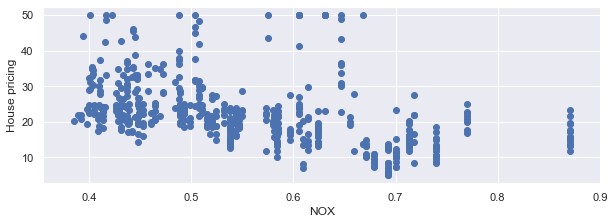

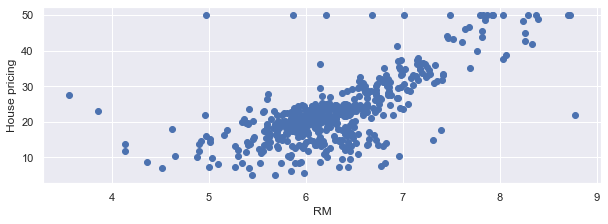

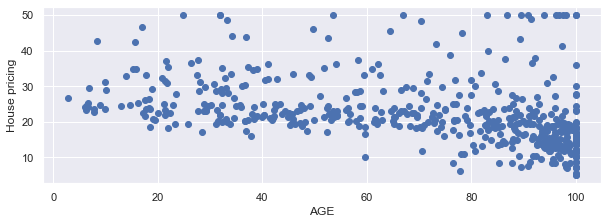

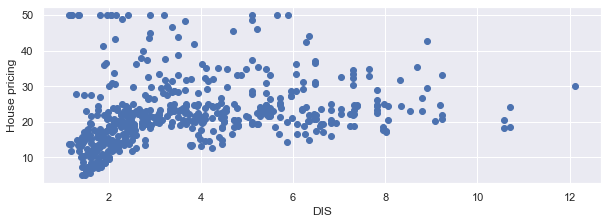

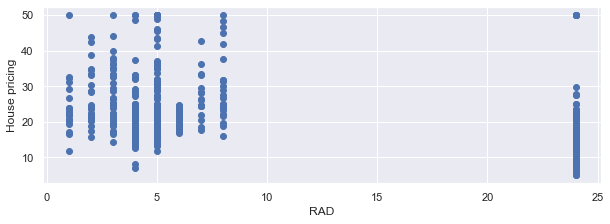

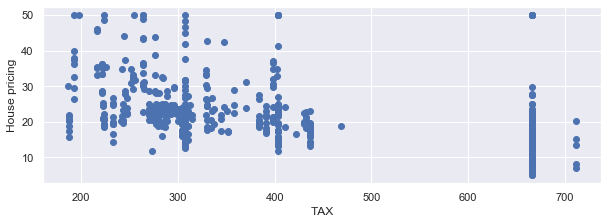

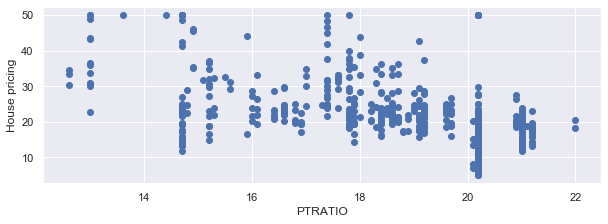

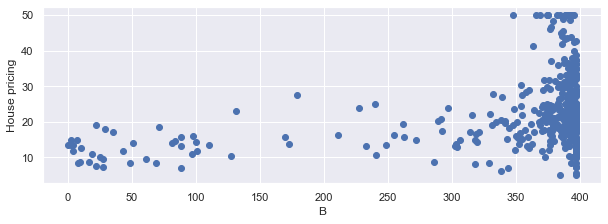

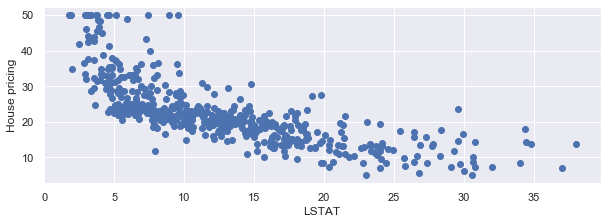

<Figure size 720x3600 with 0 Axes>

In [35]:
for i, col in enumerate(names):
    plt.subplot(len(names),1, i+1)
    x = df_x[col]
    y = df_y
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('House pricing')
    plt.figure(figsize=(8,50))

### Build Linear Model
#### Method 1: sklearn package

In [36]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
regr = linear_model.LinearRegression()

In [38]:
?regr

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [40]:
?train_test_split

In [44]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
regr.intercept_

array([35.55487454])

In [46]:
print('coefficient: \n', regr.coef_[0])

coefficient: 
 [-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [47]:
y_pred = regr.predict(x_test)

In [48]:
print('Mean squared error: %.2f \n' %np.mean((y_pred - y_test) **2))

Mean squared error: 25.42 



$R^2$

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7263451459702509

Residual Plot

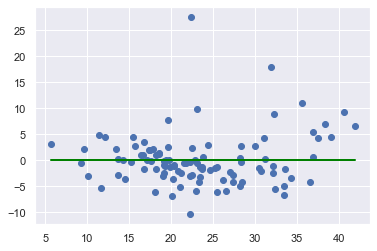

In [51]:
plt.scatter(y_pred, y_test-y_pred)
plt.plot(y_pred,np.zeros((102, 1)),color = 'green')
plt.show()

#### Method2: statsmodels package

In [52]:
import statsmodels.api as sm

In [53]:
X = sm.add_constant(x_train)

In [54]:
model2 = sm.OLS(y_train, X)

In [56]:
result = model2.fit()

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.07
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          7.71e-106
Time:                        13:08:32   Log-Likelihood:                -1190.1
No. Observations:                 404   AIC:                             2408.
Df Residuals:                     390   BIC:                             2464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5549      5.499      6.466      0.000      24.743      46.366
CRIM          -0.1160      0.037     -3.130      0.002      -0.189      -0.043
ZN             0.0471      0.016      3.021      0.003       0.016       0.078
INDUS          0.0083      0.070      0.118      0.906      -0.129       0.145
CHAS           3.2340      1.011      3.199      0.001       1.247       5.221
NOX          -16.6866      4.146     -4.025      0.000     -24.837      -8.536
RM             3.8841      0.455      8.529      0.000       2.989       4.779
AGE           -0.0109      0.015     -0.739      0.460      -0.040       0.018
DIS           -1.5413      0.224     -6.875      0.000      -1.982      -1.101
RAD            0.2932      0.074      3.988      0.000       0.149       0.438
TAX           -0.0134      0.004     -3.173      0.002      -0.022      -0.005
PTRATIO       -0.9063      0.144     -6.292      0.000      -1.189      -0.623
B              0.0088      0.003      2.952      0.003       0.003       0.015
LSTAT         -0.4577      0.057     -8.096      0.000      -0.569      -0.347
==============================================================================
Omnibus:                      140.148   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.629
Skew:                           1.487   Prob(JB):                    2.74e-125
Kurtosis:                       8.023   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculate correlation

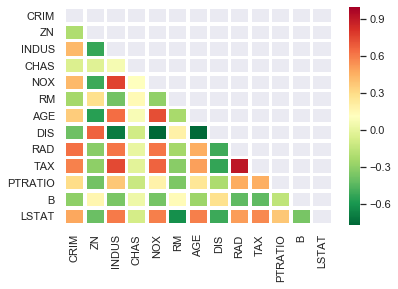

In [59]:
corr_df = x_train.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, mask=mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Varience inflation factor (VIF)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
vif

,0
const,556.376972
CRIM,1.819073
ZN,2.350218
INDUS,4.220587
CHAS,1.091273
NOX,4.366718
RM,1.931193
AGE,3.148420
DIS,4.204824
RAD,7.712959


In [94]:
# We choose a threshold of 5 which means if VIF is more than 5 for a particular variable then that variable will be removed.
drop_col = vif.loc[vif[0]>=5].iloc[1:]
drop_col.index

Index(['RAD', 'TAX'], dtype='object')

In [88]:
df_x_copy = df_x.drop(columns = drop_col.index)
df_x_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


Running linear regression again on new training set (without multicollinearity)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(df_x_copy, df_y, test_size=0.2, random_state=4)

In [90]:
X3 = sm.add_constant(x_train)
model3 = sm.OLS(y_train, X3)
result3 = model3.fit()

In [91]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     96.83
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.79e-104
Time:                        22:06:16   Log-Likelihood:                -1198.2
No. Observations:                 404   AIC:                             2420.
Df Residuals:                     392   BIC:                             2468.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8457      5.325      5.605      0.000      19.378      40.314
CRIM          -0.0753      0.034     -2.218      0.027      -0.142      -0.009
ZN             0.0399      0.015      2.608      0.009       0.010       0.070
INDUS         -0.0775      0.062     -1.256      0.210      -0.199       0.044
CHAS           3.6557      1.022      3.577      0.000       1.646       5.665
NOX          -14.2784      4.002     -3.568      0.000     -22.146      -6.411
RM             4.0904      0.459      8.904      0.000       3.187       4.994
AGE           -0.0141      0.015     -0.940      0.348      -0.043       0.015
DIS           -1.5620      0.228     -6.849      0.000      -2.010      -1.114
PTRATIO       -0.7953      0.134     -5.955      0.000      -1.058      -0.533
B              0.0075      0.003      2.525      0.012       0.002       0.013
LSTAT         -0.4606      0.058     -8.010      0.000      -0.574      -0.348
==============================================================================
Omnibus:                      141.999   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.391
Skew:                           1.507   Prob(JB):                    1.26e-127
Kurtosis:                       8.063   Cond. No.                     9.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""